In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the config

In [2]:
df = pd.read_csv('exams.csv')

Data is from https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams - Aman Chauhan

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col,missing))

gender - 0.0
race/ethnicity - 0.0
parental level of education - 0.0
lunch - 0.0
test preparation course - 0.0
math score - 0.0
reading score - 0.0
writing score - 0.0


In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,517,323,222,652,665,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.396000,69.002000,67.738000
std,NaN,NaN,NaN,NaN,NaN,15.402871,14.737272,15.600985
min,NaN,NaN,NaN,NaN,NaN,13.000000,27.000000,23.000000
25%,NaN,NaN,NaN,NaN,NaN,56.000000,60.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,66.500000,70.000000,68.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.000000,79.000000


1000 records, 2 genders, 5 ethnic groups (A-E), 6 Parental Edu Levels, 2 types of lunch, binary test prep, seperate scores for 3 testings.

test scores ranged; Math: 15.4% - 100%, Reading: 14.7% - 100%, Writing: 15.6% - 100%.
Previous check showed lunch is either: standard or free/reduced
test prep: none or completed
check all paternal levels of education next

In [7]:
pd.set_option('display.max_rows',None)

In [65]:
df.head()

,gender,ethnic,parental_loe,lunch,prep_course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [9]:
for col in df:
    print(df[col].unique())

['male' 'female']
['group A' 'group D' 'group E' 'group B' 'group C']
['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
['standard' 'free/reduced']
['completed' 'none']
[ 67  40  59  77  78  63  62  93  47  99  80  74  81  69  58  54  23  39
  83  71  44  46  51  53  33  87  65  79  68  57  98 100  60  64  52  36
  56  88  42  76  49  72  31  32  97  94  95  45  75  66  70  82  92  30
  41  43  55  73  48  86  84  50  89  91  85  61  35  90  96  13  38  28
  26  37  29  34  25]
[ 67  59  60  78  73  77  88  56  42  83  87  74  61  47  62  44  32  76
  52  69  55  38  45  68  89  54  79  41  65  81  75  70  46  63  72  58
  53  57  80  51  66  82  93  64  91  43  71 100  50  33  34  90  84  95
  98  92  85  49  86  48  94  36  28  39  29  96  97  40  27  37  99  31
  35]
[ 63  55  50  68  76  84  65  45  85  90  73  57  42  44  31  88  54  32
  56  60  89  51  77  39  71  74  75  72  64  82  70  87  78  49  47  62
  83  48  59 

Parental education levels are as follows:
'high school' 
'some high school' 
'some college' 
"associate's degree"
 "bachelor's degree" 
 "master's degree"

In [10]:
df.rename({'parental level of education':'parental_loe'}, axis=1,inplace=True)

changed "parental level of education" to "parental_LoE" for ease of use.

In [11]:
df['parental_loe'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental_loe, dtype: int64

In [12]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


headers need to be changed to allow consistent formatting

In [13]:
df.rename(columns = {'race/ethnicity':'ethnic',
                       'test preparation course': 'prep_course'}, inplace = True)


In [14]:
df.head()

,gender,ethnic,parental_loe,lunch,prep_course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


using pd.get_dummies to numerize qualitative data for correlation

In [15]:
df_dum = pd.get_dummies(df)

Now we can see how the data is correlated

In [16]:
df_dum.corr()

,math score,reading score,writing score,gender_female,gender_male,ethnic_group A,ethnic_group B,ethnic_group C,ethnic_group D,ethnic_group E,parental_loe_associate's degree,parental_loe_bachelor's degree,parental_loe_high school,parental_loe_master's degree,parental_loe_some college,parental_loe_some high school,lunch_free/reduced,lunch_standard,prep_course_completed,prep_course_none
math score,1.000000,0.819398,0.805944,-0.200863,0.200863,-0.022464,-0.106384,-0.146533,0.111121,0.203515,0.102966,0.117535,-0.038827,0.092484,-0.038123,-0.179725,-0.374431,0.374431,0.151704,-0.151704
reading score,0.819398,1.000000,0.954274,0.189389,-0.189389,-0.008849,-0.065486,-0.122770,0.124821,0.092907,0.067950,0.120719,-0.054685,0.119698,-0.034704,-0.151530,-0.288282,0.288282,0.245144,-0.245144
writing score,0.805944,0.954274,1.000000,0.246089,-0.246089,-0.014337,-0.065177,-0.142404,0.172772,0.061645,0.076878,0.151974,-0.093295,0.143354,-0.034386,-0.161996,-0.319191,0.319191,0.315601,-0.315601
gender_female,-0.200863,0.189389,0.246089,1.000000,-1.000000,-0.008584,0.074281,-0.008597,-0.002485,-0.066861,-0.084821,0.024773,-0.017774,0.064235,-0.034795,0.080166,-0.033962,0.033962,-0.007653,0.007653
gender_male,0.200863,-0.189389,-0.246089,-1.000000,1.000000,0.008584,-0.074281,0.008597,0.002485,0.066861,0.084821,-0.024773,0.017774,-0.064235,0.034795,-0.080166,0.033962,-0.033962,0.007653,-0.007653
ethnic_group A,-0.022464,-0.008849,-0.014337,-0.008584,0.008584,1.000000,-0.148723,-0.202298,-0.174504,-0.113713,-0.046425,0.060564,-0.008846,0.035889,0.021962,-0.038564,-0.011612,0.011612,0.043475,-0.043475
ethnic_group B,-0.106384,-0.065486,-0.065177,0.074281,-0.074281,-0.148723,1.000000,-0.350752,-0.302563,-0.197160,-0.009946,-0.023250,-0.014869,0.045144,0.020802,-0.007278,-0.006968,0.006968,0.017450,-0.017450
ethnic_group C,-0.146533,-0.122770,-0.142404,-0.008597,0.008597,-0.202298,-0.350752,1.000000,-0.411556,-0.268184,0.050140,-0.007974,-0.038595,-0.021875,-0.013924,0.023431,0.011655,-0.011655,-0.028113,0.028113
ethnic_group D,0.111121,0.124821,0.172772,-0.002485,0.002485,-0.174504,-0.302563,-0.411556,1.000000,-0.231339,-0.018013,-0.002481,0.034416,-0.020857,-0.006370,0.005542,-0.062906,0.062906,-0.018165,0.018165
ethnic_group E,0.203515,0.092907,0.061645,-0.066861,0.066861,-0.113713,-0.197160,-0.268184,-0.231339,1.000000,0.002999,-0.006316,0.033500,-0.025207,-0.014848,-0.000158,0.083452,-0.083452,0.007002,-0.007002


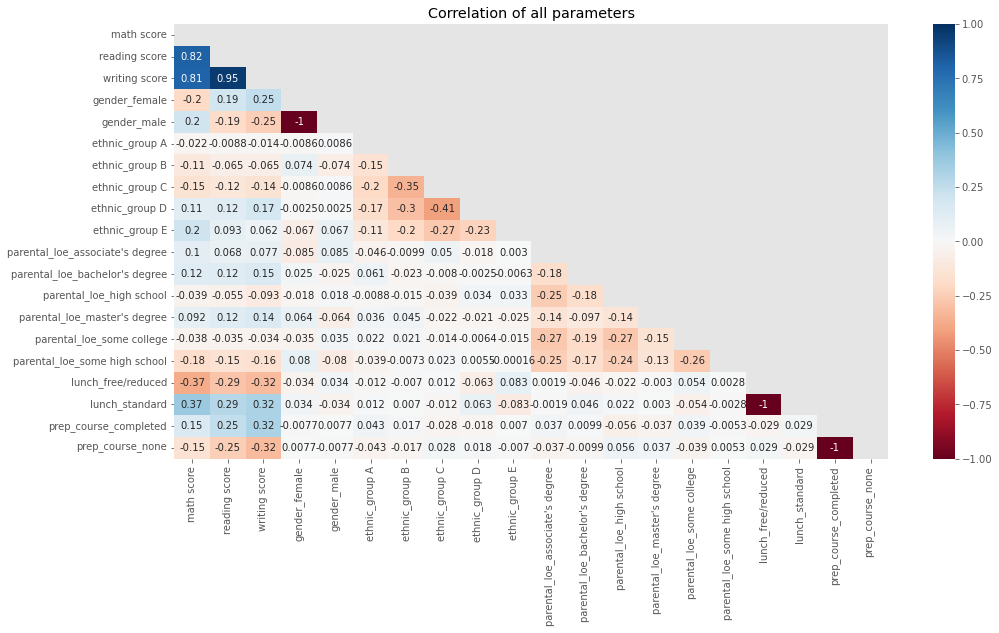

In [35]:
data = df_dum.corr()
mask = np.triu(np.ones_like(data, dtype=bool))
plt.figure(figsize=(16, 8))
sns.heatmap(data, vmin=-1, vmax=1, mask=mask, annot=True, cmap='RdBu')
plt.title('Correlation of all parameters')
plt.show()

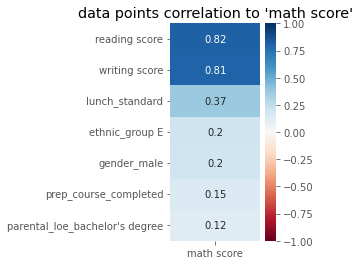

In [67]:
plt.figure(figsize=(2, 4))
heatmap = sns.heatmap(data[['math score']].sort_values(by='math score', ascending=False)[1:8], 
                      vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title("data points correlation to 'math score'")
plt.show()

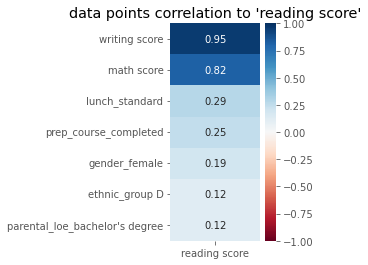

In [19]:
plt.figure(figsize=(2, 4))
heatmap = sns.heatmap(data[['reading score']].sort_values(by='reading score', ascending=False)[1:8], 
                      vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title("data points correlation to 'reading score'")
plt.show()

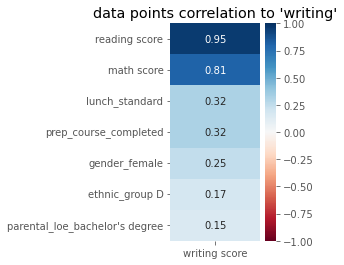

In [20]:
plt.figure(figsize=(2, 4))
heatmap = sns.heatmap(data[['writing score']].sort_values(by='writing score', ascending=False)[1:8],
                      vmin=-1,vmax=1, annot=True, cmap="RdBu")
heatmap.set_title("data points correlation to 'writing'")
plt.show()

highest correlation for all scores was directly related to OTHER scores. reading/writing were correlated at .95, and students that were good at math were slighhtly better at reading, than they were at writing, .1 difference.

After this correlation, standard lunch (parents able to pay for it), is Parental Bachelor's Degree, and test prep course completion. Male students were slightly better at math, and female students at reading/writing.

In [38]:
corr_mat = df_dum.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

math score                       math score                         1.000000
                                 reading score                      0.819398
                                 writing score                      0.805944
                                 gender_female                     -0.200863
                                 gender_male                        0.200863
                                 ethnic_group A                    -0.022464
                                 ethnic_group B                    -0.106384
                                 ethnic_group C                    -0.146533
                                 ethnic_group D                     0.111121
                                 ethnic_group E                     0.203515
                                 parental_loe_associate's degree    0.102966
                                 parental_loe_bachelor's degree     0.117535
                                 parental_loe_high school          -0.038827

In [47]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

gender_male                      gender_female                     -1.000000
gender_female                    gender_male                       -1.000000
lunch_standard                   lunch_free/reduced                -1.000000
lunch_free/reduced               lunch_standard                    -1.000000
prep_course_completed            prep_course_none                  -1.000000
prep_course_none                 prep_course_completed             -1.000000
ethnic_group D                   ethnic_group C                    -0.411556
ethnic_group C                   ethnic_group D                    -0.411556
lunch_free/reduced               math score                        -0.374431
math score                       lunch_free/reduced                -0.374431
ethnic_group C                   ethnic_group B                    -0.350752
ethnic_group B                   ethnic_group C                    -0.350752
lunch_free/reduced               writing score                     -0.319191

In [64]:
high_pos_corr = sorted_pairs[(sorted_pairs > .3)& (sorted_pairs < .999)]
high_pos_corr

writing score          prep_course_completed    0.315601
prep_course_completed  writing score            0.315601
writing score          lunch_standard           0.319191
lunch_standard         writing score            0.319191
                       math score               0.374431
math score             lunch_standard           0.374431
                       writing score            0.805944
writing score          math score               0.805944
reading score          math score               0.819398
math score             reading score            0.819398
reading score          writing score            0.954274
writing score          reading score            0.954274
dtype: float64

In [63]:
high_neg_corr = sorted_pairs[(sorted_pairs< -0.3) & (sorted_pairs>-.999)]

high_neg_corr

ethnic_group D      ethnic_group C       -0.411556
ethnic_group C      ethnic_group D       -0.411556
lunch_free/reduced  math score           -0.374431
math score          lunch_free/reduced   -0.374431
ethnic_group C      ethnic_group B       -0.350752
ethnic_group B      ethnic_group C       -0.350752
lunch_free/reduced  writing score        -0.319191
writing score       lunch_free/reduced   -0.319191
                    prep_course_none     -0.315601
prep_course_none    writing score        -0.315601
ethnic_group B      ethnic_group D       -0.302563
ethnic_group D      ethnic_group B       -0.302563
dtype: float64

the highest correlation for scoring is to have a high grade in the other subjects. the next correlation will standard lunch, assuming this is due to parents with higher degrees able to pay for such lunch. there is a weak correlation of parent degree holders and high grades, but the better indicator was the test prep done or not. 